In [1]:
import pandas as pd
import seaborn as sns

In [2]:
test_df = pd.read_csv('/Users/shubham/Projects/kaggle/house-prices-advanced-regression-techniques/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<AxesSubplot:>

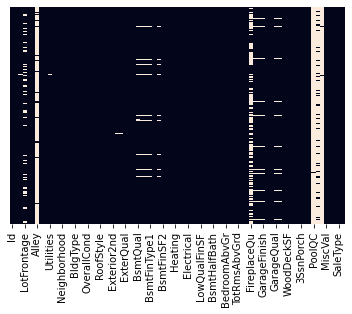

In [3]:
sns.heatmap(test_df.isnull(),yticklabels=False, cbar=False)

In [4]:
test_df.isnull().mean().sort_values(ascending=False)

PoolQC           0.997944
MiscFeature      0.965045
Alley            0.926662
Fence            0.801234
FireplaceQu      0.500343
                   ...   
Electrical       0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
SaleCondition    0.000000
Length: 80, dtype: float64

In [5]:
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
test_df.drop(columns=columns_to_drop,inplace=True)

<AxesSubplot:>

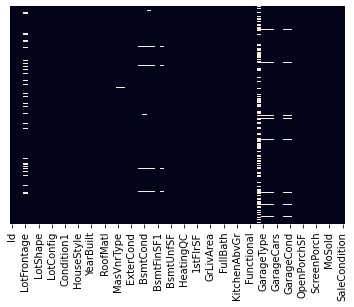

In [6]:
sns.heatmap(test_df.isnull(),yticklabels=False, cbar=False)

In [7]:
test_df.isnull().mean().sort_values(ascending=False)

FireplaceQu      0.500343
LotFrontage      0.155586
GarageYrBlt      0.053461
GarageFinish     0.053461
GarageQual       0.053461
                   ...   
CentralAir       0.000000
Electrical       0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
SaleCondition    0.000000
Length: 76, dtype: float64

In [8]:
missing_value_columns = [column for column in test_df.columns if test_df[column].isnull().mean()>0]
missing_value_columns

['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [41]:
test_df['SaleType'].isnull().sum()

1

In [9]:
categorical_columns = [column for column in missing_value_columns if len(test_df[column].unique())<25]
categorical_columns

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [10]:
len(categorical_columns)

21

In [22]:
test_df[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   Utilities     1457 non-null   object 
 2   Exterior1st   1458 non-null   object 
 3   Exterior2nd   1458 non-null   object 
 4   MasVnrType    1443 non-null   object 
 5   BsmtQual      1415 non-null   object 
 6   BsmtCond      1414 non-null   object 
 7   BsmtExposure  1415 non-null   object 
 8   BsmtFinType1  1417 non-null   object 
 9   BsmtFinType2  1417 non-null   object 
 10  BsmtFullBath  1457 non-null   float64
 11  BsmtHalfBath  1457 non-null   float64
 12  KitchenQual   1458 non-null   object 
 13  Functional    1457 non-null   object 
 14  FireplaceQu   729 non-null    object 
 15  GarageType    1383 non-null   object 
 16  GarageFinish  1381 non-null   object 
 17  GarageCars    1458 non-null   float64
 18  GarageQual    1381 non-null 

In [24]:
test_df['BsmtFullBath'].unique()

array([ 0.,  1.,  2.,  3., nan])

In [27]:
for column in categorical_columns:
    print(column +" "+ str(test_df[column].mode()[0]))

MSZoning RL
Utilities AllPub
Exterior1st VinylSd
Exterior2nd VinylSd
MasVnrType None
BsmtQual TA
BsmtCond TA
BsmtExposure No
BsmtFinType1 GLQ
BsmtFinType2 Unf
BsmtFullBath 0.0
BsmtHalfBath 0.0
KitchenQual TA
Functional Typ
FireplaceQu Gd
GarageType Attchd
GarageFinish Unf
GarageCars 2.0
GarageQual TA
GarageCond TA
SaleType WD


In [28]:
for column in categorical_columns:
    test_df[column].fillna(test_df[column].mode()[0], inplace=True)

In [29]:
test_df.isnull().mean().sort_values(ascending=False)

LotFrontage      0.155586
GarageYrBlt      0.053461
MasVnrArea       0.010281
TotalBsmtSF      0.000685
BsmtUnfSF        0.000685
                   ...   
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinType2     0.000000
MSSubClass       0.000000
SaleCondition    0.000000
Length: 76, dtype: float64

In [30]:
discrete_columns = [column for column in missing_value_columns if column not in categorical_columns]
discrete_columns

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageYrBlt',
 'GarageArea']

In [32]:
for column in discrete_columns:
    print(column+" "+str(test_df[column].mean()))

LotFrontage 68.58035714285714
MasVnrArea 100.70914127423822
BsmtFinSF1 439.2037037037037
BsmtFinSF2 52.61934156378601
BsmtUnfSF 554.2949245541838
TotalBsmtSF 1046.1179698216736
GarageYrBlt 1977.7212165097756
GarageArea 472.76886145404666


In [33]:
for column in discrete_columns:
    test_df[column].fillna(test_df[column].mean(),inplace=True)

In [34]:
test_df.shape

(1459, 76)

In [35]:
test_df.to_csv('formulatedtest.csv', index=False)